In [ ]:
# 'trump_speech.txt'
# 'moon_speech.txt'

In [1]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.6 MB/s 
     |████████████████████████████████| 448 kB 32.6 MB/s 


In [2]:
!pip install wordcloud

In [3]:
# 한글 문서 => 형태소 분석기 => 형태소(가장 작은 단위의 의미) 추출
# 영어 문서 => tokenizer => token 추출

In [4]:
import pandas as pd
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

In [6]:
f = open('trump_speech.txt', 'r', encoding='utf-8')
lines = f.read()
f.close()

In [7]:
print(lines)

﻿One year ago, I stood before you for the first time in this grand hall. I addressed the threats facing our world, and I presented a vision to achieve a brighter future for all of humanity.

Today, I stand before the United Nations General Assembly to share the extraordinary progress we’ve made.

In less than two years, my administration has accomplished more than almost any administration in the history of our country.

America’s -- so true. [Laughter] Didn’t expect that reaction, but that’s okay. [Laughter and applause.]

America’s economy is booming like never before. Since my election, we’ve added $10 trillion in wealth. The stock market is at an all-time high in history, and jobless claims are at a 50-year low. African American, Hispanic American, and Asian American unemployment have all achieved their lowest levels ever recorded. We’ve added more than 4 million new jobs, including half a million manufacturing jobs.

POLITICO Playbook newsletter
Sign up today to receive the #1-rat

In [8]:
tokenizer = RegexpTokenizer('[\w]+')

In [9]:
# 대소문자 통일 - 영문
words = lines.lower()

In [10]:
# 토큰 단위로 구분 ( 한글 : 형태소 분리)
tokens = tokenizer.tokenize(words)
tokens

['one',
 'year',
 'ago',
 'i',
 'stood',
 'before',
 'you',
 'for',
 'the',
 'first',
 'time',
 'in',
 'this',
 'grand',
 'hall',
 'i',
 'addressed',
 'the',
 'threats',
 'facing',
 'our',
 'world',
 'and',
 'i',
 'presented',
 'a',
 'vision',
 'to',
 'achieve',
 'a',
 'brighter',
 'future',
 'for',
 'all',
 'of',
 'humanity',
 'today',
 'i',
 'stand',
 'before',
 'the',
 'united',
 'nations',
 'general',
 'assembly',
 'to',
 'share',
 'the',
 'extraordinary',
 'progress',
 'we',
 've',
 'made',
 'in',
 'less',
 'than',
 'two',
 'years',
 'my',
 'administration',
 'has',
 'accomplished',
 'more',
 'than',
 'almost',
 'any',
 'administration',
 'in',
 'the',
 'history',
 'of',
 'our',
 'country',
 'america',
 's',
 'so',
 'true',
 'laughter',
 'didn',
 't',
 'expect',
 'that',
 'reaction',
 'but',
 'that',
 's',
 'okay',
 'laughter',
 'and',
 'applause',
 'america',
 's',
 'economy',
 'is',
 'booming',
 'like',
 'never',
 'before',
 'since',
 'my',
 'election',
 'we',
 've',
 'added',
 

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
# 불용어 : 전체 문맥에서 의미를 갖지 않는 토큰( 형태소)

stop_words = stopwords.words('english')
stopped_tokens = [i for i in list(tokens) if not i in stop_words]

In [13]:
stopped_tokens1 = [i for i in stopped_tokens if len(i) > 1]  # 영문

In [14]:
word_count = pd.Series(stopped_tokens1).value_counts()
word_count.head(10)

nations      31
united       29
states       25
people       22
countries    20
world        20
us           17
america      16
new          14
iran         12
dtype: int64

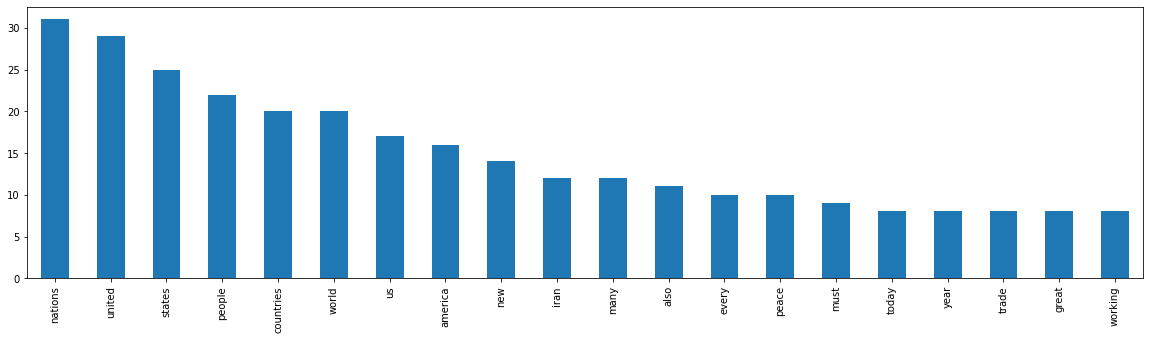

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
word_count[:20].plot(kind='bar')

In [17]:
!pip install collection

  Created wheel for collection: filename=collection-0.1.6-py3-none-any.whl size=5115 sha256=af4b66458f01f2d28bf587848414aff341393d0e05b8d941fdd0a4af6b85e48e
  Stored in directory: /root/.cache/pip/wheels/45/ed/3c/29a1c0600bb908a2e7421dc3a3775cbaed434a71b4ed93a439
Successfully built collection


In [20]:
import wordcloud

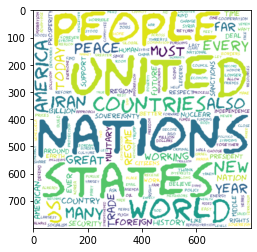

In [25]:
from wordcloud import WordCloud
from collections import Counter
font_path = '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf'

wordcloud = WordCloud(
font_path = font_path,
width = 800,
height=800,
background_color = 'white')

count = Counter(stopped_tokens1)

wordcloud = wordcloud.generate_from_frequencies(count)

def __array__(self):
    return self.to_array()

def to_array(self):
    return np.array(self.to_image())

array = wordcloud.to_array()

plt.imshow(array, interpolation = 'bilinear')
plt.show()

In [26]:
from konlpy.tag import Hannanum
han = Hannanum()

In [ ]:
f = open('moon_speech.txt', 'r', encoding='utf-8')
lines = f.read()
print(lines)

In [29]:
words = han.nouns(lines)
print(words)

['\ufeff존경하', '사랑', '국민여러분', '감사', '국민여러분', '위대한', '선택', '머리', '저', '오늘', '대한민국', '저', '19대', '대통령', '대한민국', '첫', '저', '두', '어깨', '국민여러분으로부터', '부', '막중', '소명감', '저', '가슴', '한번', '경험', '나라', '열정', '저', '머리', '통합', '공존', '세상', '청사진', '우리', '대한민국', '좌절', '패배', '불구', '우리', '선대들', '일관', '추구', '나라', '희생', '헌신', '감내', '젊은이들', '나라', '대한민국', '저', '역사', '국민앞', '겸허한', '마음', '대한민국', '저', '19대', '대통령', '소명', '것', '천명', '선거', '후보들', '감사', '심심', '위로', '이번', '선거', '승자', '패자', '우리', '대한민국', '동반자', '치열', '경쟁', '순간', '뒤', '손', '앞', '전진', '것', '존경', '국민여러분', '몇달', '우리', '정치', '격변기', '정치', '혼란', '국민', '위대', '현직대통령', '탄핵', '구속', '앞', '국민들', '대한민국', '앞길', '국민들', '좌절', '이', '전화위복', '기회', '승화', '오늘', '세상', '대한민국', '위대함', '국민', '위대함', '이번', '대선', '국민들', '또하나', '역사', '전국', '각지', '골고른', '지지', '대통령', '선택', '오늘', '저', '국민', '모두', '대통령', '저', '국민', '한분한분', '저', '국민', '우리', '국민', '저', '약속드', '2017년', '5월', '10', '이날', '진정한', '국민통합', '시작', '날', '역사', '기록', '것', '존경', '사랑', '국민여러분', '세월', '국민들', '이', '나라', '대통령', '문재인'

In [30]:
word_count = pd.Series(words).value_counts()
word_count

대통령     26
저       16
국민      12
것       10
대한민국    10
        ..
시장       1
시민들      1
격의       1
때        1
신명       1
Length: 284, dtype: int64

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [46]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

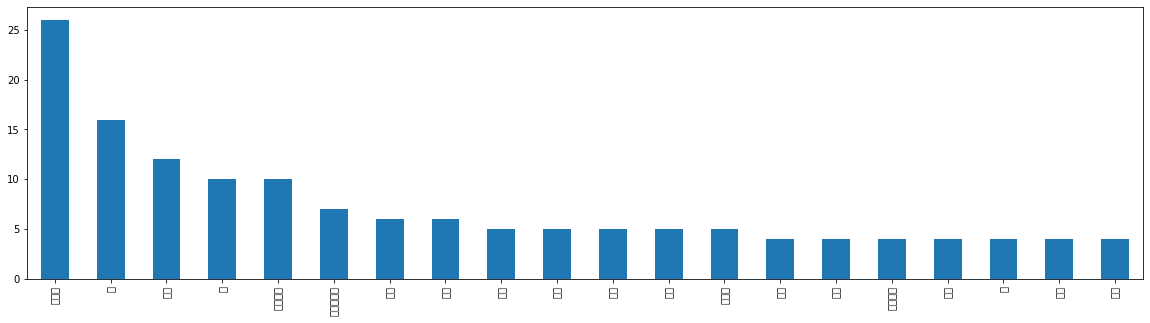

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
word_count[:20].plot(kind='bar')
plt.show()

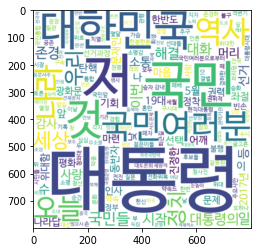

In [49]:
from wordcloud import WordCloud
from collections import Counter
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

wordcloud = WordCloud(
font_path = font_path,
width = 800,
height=800,
background_color = 'white')

count = Counter(words)

wordcloud = wordcloud.generate_from_frequencies(count)

def __array__(self):
    return self.to_array()

def to_array(self):
    return np.array(self.to_image())

array = wordcloud.to_array()

plt.imshow(array, interpolation = 'bilinear')
plt.show()